# Auto MPG Data Set

#### Data Set Information:

#### This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

#### "The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)



##### Attribute Information:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

In [1]:
#import libraries
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('mpg_dataset.csv',header=None,names=['mpg','cylinders','displacement','horsepower','weight','acceleration','year','origin','car_name'])

In [3]:
#check shape
df.shape

(406, 9)

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [5]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       406 non-null int64
displacement    406 non-null float64
horsepower      400 non-null float64
weight          406 non-null int64
acceleration    406 non-null float64
year            406 non-null int64
origin          406 non-null int64
car_name        406 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.6+ KB


In [6]:
#check null
df.isnull().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
year            0
origin          0
car_name        0
dtype: int64

In [7]:
df['horsepower']=df['horsepower'].fillna((df['horsepower'].mean()))

In [8]:
df['mpg']=df['mpg'].fillna(df['mpg'].mean())

In [9]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
car_name        0
dtype: int64

In [10]:
df.replace('?',0,inplace=True)

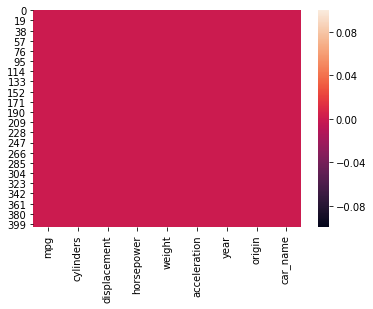

In [11]:
sns.heatmap(df.isnull())

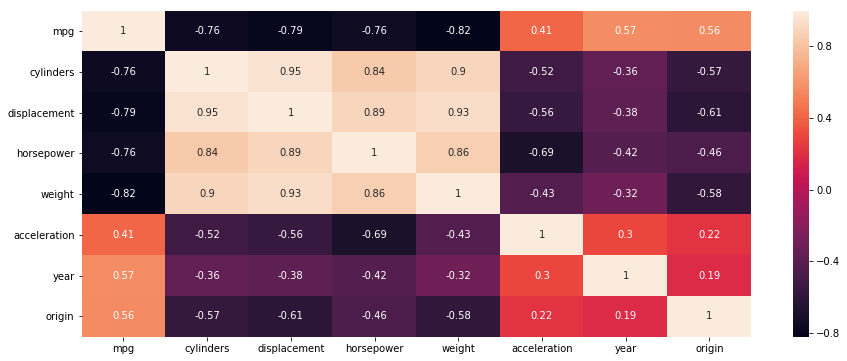

In [12]:
#check corr
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

In [13]:
#datatypes
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
car_name         object
dtype: object

In [14]:
#df describe
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.738404,1.712160,104.922458,38.480531,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,76.000000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,129.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


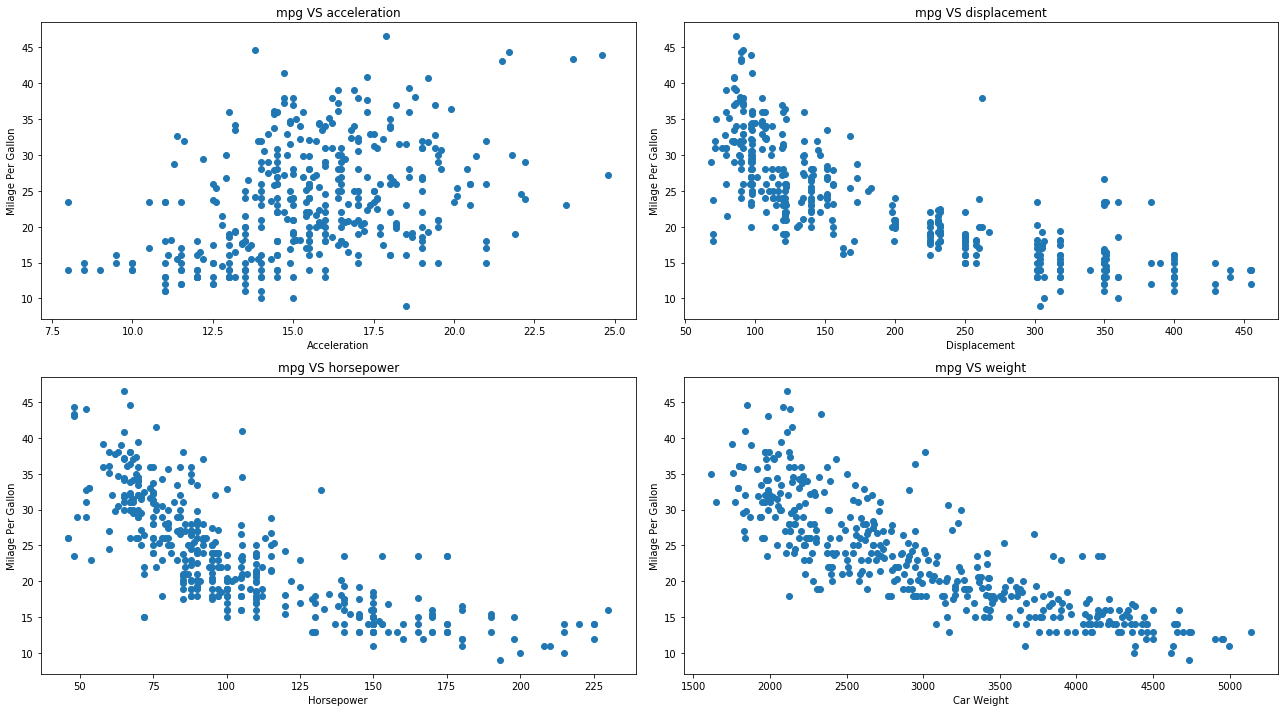

In [15]:
# plotting mileage against acceleraion, displacement, weight and horsepower
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,10))
ax[0,0].scatter(x='acceleration', y='mpg', data=df)
ax[0,0].set_title('mpg VS acceleration')
ax[0,0].set_xlabel('Acceleration')
ax[0,0].set_ylabel('Milage Per Gallon')

ax[0,1].scatter(x='displacement', y='mpg', data=df)
ax[0,1].set_title('mpg VS displacement')
ax[0,1].set_xlabel('Displacement')
ax[0,1].set_ylabel('Milage Per Gallon')

ax[1,0].scatter(x='horsepower', y='mpg', data=df)
ax[1,0].set_title('mpg VS horsepower')
ax[1,0].set_xlabel('Horsepower')
ax[1,0].set_ylabel('Milage Per Gallon')

ax[1,1].scatter(x='weight', y='mpg', data=df)
ax[1,1].set_title('mpg VS weight')
ax[1,1].set_xlabel('Car Weight')
ax[1,1].set_ylabel('Milage Per Gallon')
plt.tight_layout()
plt.show()

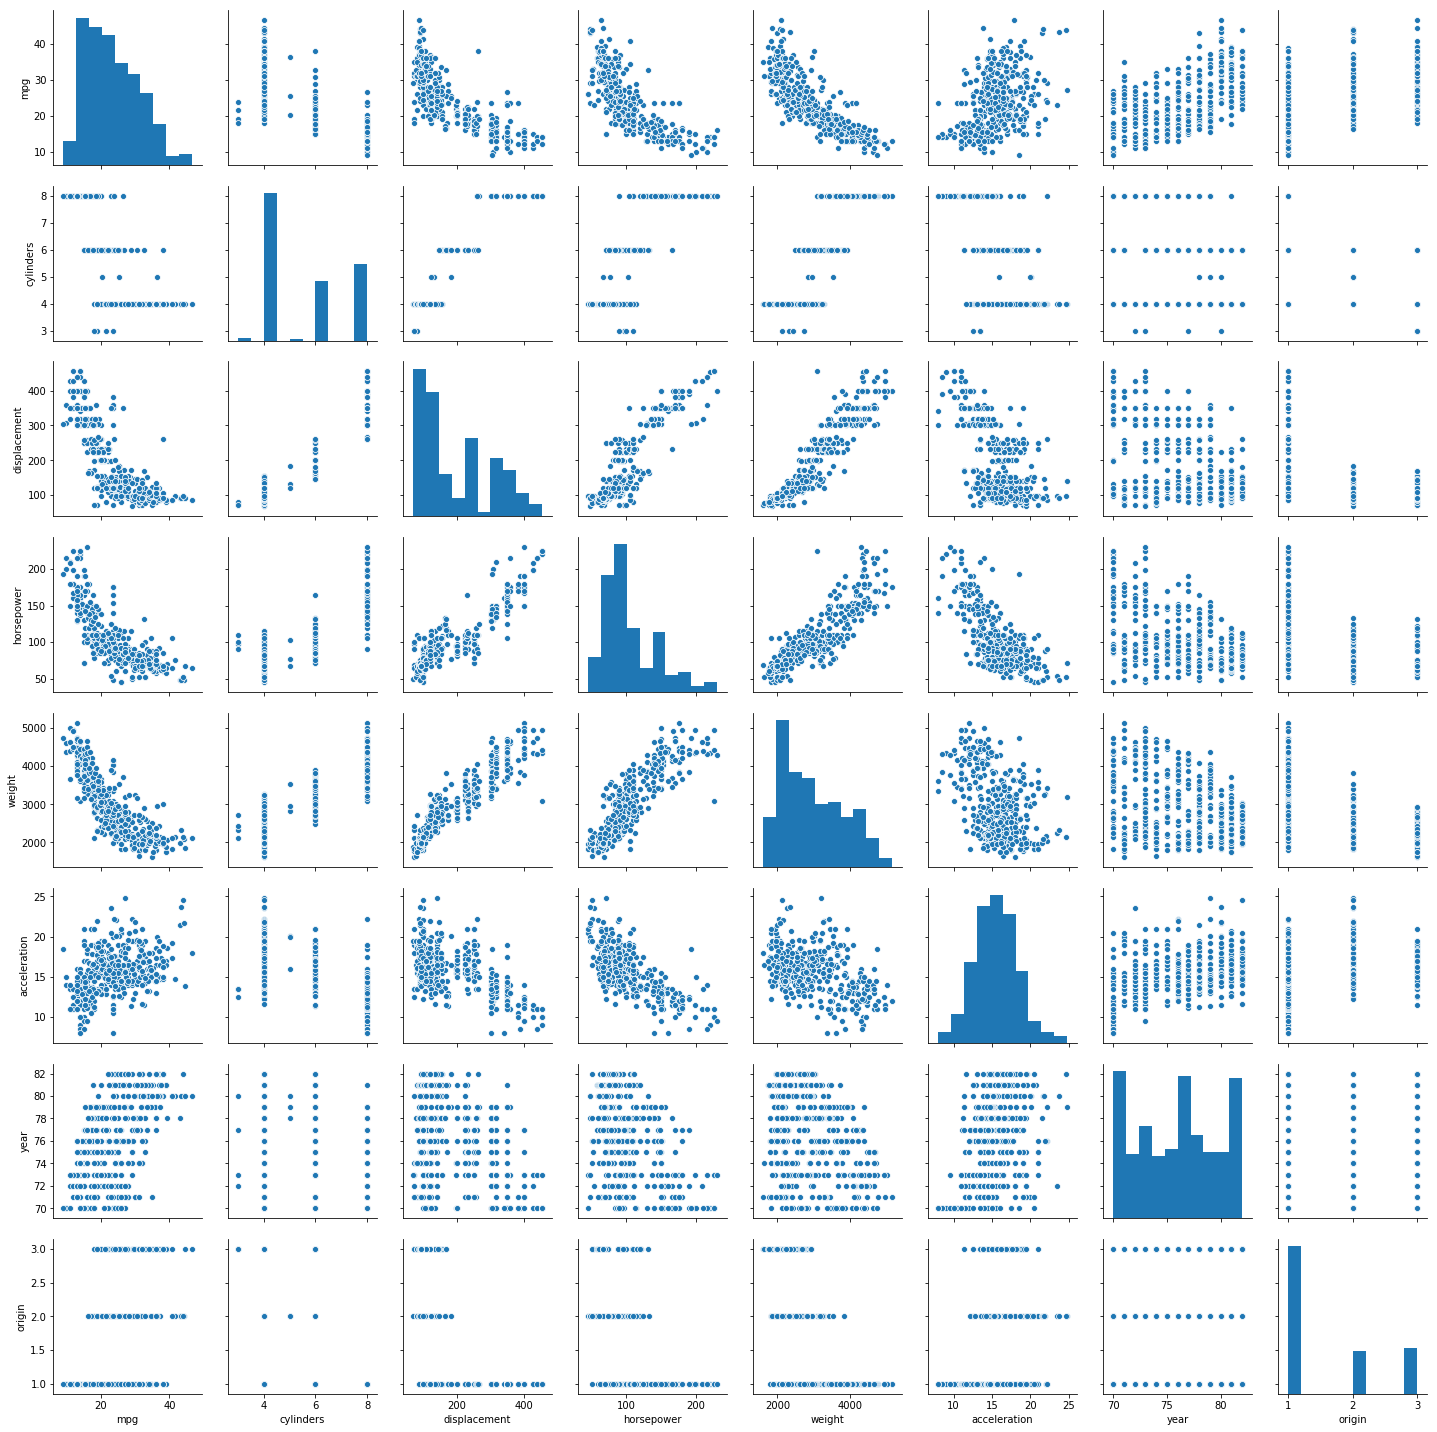

In [16]:
sns.pairplot(df)

In [17]:
df.drop(['origin','year','origin','car_name'],axis=1).head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5


In [18]:
x=df.iloc[:,1:6]

In [19]:
y=df['mpg']

In [20]:
#scaling the imput variable
#Linearregression algorithm requires all features to be on common scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
def max_r2_score(clf,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print(clf,"max r2 score corresponding to ",final_r_state," is ",max_r_score)

In [22]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC

# Import ensemble machine learning library
from sklearn.ensemble import RandomForestRegressor
model=[LinearRegression()]
for m in model:
    max_r2_score(m,x,y)
    
    


LinearRegression() max r2 score corresponding to  92  is  0.7643402608089959


In [23]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 42,test_size=0.20)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print('r2_score',r2_score(y_train, regressor.predict(x_train)))
rf_accuracy = round(regressor.score(x_train,y_train),2)
print('rf_accuracy:',rf_accuracy)

r2_score 0.9643758852063649
rf_accuracy: 0.96


In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, x_train, y_train, cv=5, scoring='r2')
print(np.sqrt(np.abs(cv_score)))

[0.83817515 0.82803572 0.85428566 0.82935643 0.88002623]


In [25]:
#Lets find the rmse and r2_score using sklearn.metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  4.458546667714322
r2_score is:  0.6796506948861241


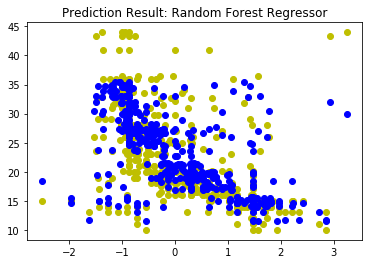

In [26]:
plt.plot(x_test, y_test, 'yo')
plt.plot(x_test, y_pred, "bo")
plt.title('Prediction Result: Random Forest Regressor')
plt.show()

In [27]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
70,14.0,14.625146
218,16.5,19.461583
258,20.2,17.418146
33,11.0,13.138000
42,17.0,18.563000


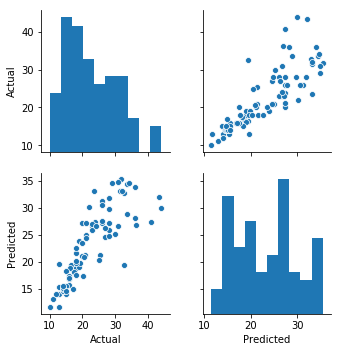

In [28]:
sns.pairplot(df)

In [29]:
#Lets save this model using joblib
#Lets save the above model
from joblib import dump, load
dump(regressor, 'mpg.joblib') 


['mpg.joblib']